**September 5, 2019**  
**ATMOS 5020: Environmental Programming**  
**Brian Blaylock and John Horel**  


Exciting weather happening a half hour ago!
- [Watch the Camera Timelapse videos](http://home.chpc.utah.edu/~u0553130/Camera_Display/)
- [Look at the GOES-East Lightning Mapper](https://rammb-slider.cira.colostate.edu/?sat=goes-17&z=4&im=12&ts=1&st=0&et=0&speed=130&motion=loop&map=1&lat=0&opacity%5B0%5D=1&hidden%5B0%5D=0&pause=0&slider=-1&hide_controls=0&mouse_draw=0&follow_feature=0&follow_hide=0&s=rammb-slider&sec=conus&p%5B0%5D=geocolor&x=8961&y=3527.5)


> ## Announcements: 
> Check Your Understanding #3 is due today.  
> Assignment #2 is due Friday.


> ## Today's Objective:
> - Part 1: Quick review of loops, if statements, and introduce Functions.
> - Part 2: Introduction to Matplotlib. Learn how to make line and scatter plots.



Download this notebook from GitHub (right click the `raw` button and `save target as`), then open in Jupyter Lab.

---

# Python Functions (Chapter 8)
We have used some numpy functions to create array objects and calculate the sum of a list. The general use of a function is...

    output = function_name(input)
    
Below, we import numpy with the alias np, and use the `np.sum` function to find the sum of all the values in the list.

In [1]:
import numpy as np

some_list = [1,2,3,4,5]
a = np.sum(some_list)

print(a)

15


## You can write your own functions 👏🏼

Functions are blocks of code that perform actions. They typically take input, do something with the input, and send out output.

To define a new function, follow the syntax below.

    def function_name(input):
        [do something...]
        return output
        
For example, if we can write a function that converts the value of a number in degrees C to degrees F.

In [2]:
def CtoF(C):
    F = 9/5*C + 32
    return F

After the function is created, you call it by its name and give it input.

In [3]:
# Give the function 10, and the output is 50
CtoF(10)

50.0

In [4]:
# Use the function to convert some values from C to F
print(CtoF(0), 'F')
print(CtoF(5), 'F')
print(CtoF(10), 'F')
print(CtoF(100), 'F')
print()

32.0 F
41.0 F
50.0 F
212.0 F



In [5]:
# Use the function within a loop to convert all values in a list
for C in np.arange(-10, 50, 5):
    print('{} C is equal to {} F'.format(C, CtoF(C)))

-10 C is equal to 14.0 F
-5 C is equal to 23.0 F
0 C is equal to 32.0 F
5 C is equal to 41.0 F
10 C is equal to 50.0 F
15 C is equal to 59.0 F
20 C is equal to 68.0 F
25 C is equal to 77.0 F
30 C is equal to 86.0 F
35 C is equal to 95.0 F
40 C is equal to 104.0 F
45 C is equal to 113.0 F


Function can have more than one input, and can have some complexity. Below computes [compound interest](https://en.wikipedia.org/wiki/Compound_interest) from 4 inputs (pay attention to the comments to see what the input should be.

In [6]:
def compound_interest(P, r, n, t):
    """
    Compute the value of a deposit with compound interest
    https://en.wikipedia.org/wiki/Compound_interest
    
    Input:
        P = principle amount (the initial amount deposited)
        r = annual interest rate (as a percent)
        n = number of times interest is compounded a year
            As a string: 'monthly', 'quarterly', or 'annually'.
        t = number of years
    
    Return:
        A = Amount of money accumulated
    """
    
    # Convert rate from percent to a decimal
    rate = r/100
    
    # Compound frequency
    if n == 'monthly':
        frequency = 12
    elif n == 'quarterly':
        frequency = 4
    elif n == 'annually':
        frequency = 1
    
    A = P*(1+(rate/frequency))**(frequency*t)
    
    return A

In [7]:
principle = 1000        # 1000 Dollars deposited
rate = 10               # 10% annual interest rate
frequency = 'monthly'   # Compounded monthly
years = 10              # 10 years

value = compound_interest(principle, rate, frequency, years)

print('${:.2f} will be worth ${:.2f} after {} years with {}% interest'.format(principle, value, years, rate))

$1000.00 will be worth $2707.04 after 10 years with 10% interest


For fun, how does the amount of money change with each year?

In [8]:
principle = 1000        # 1000 Dollars deposited
rate = 10               # 10% annual interest rate
frequency = 'monthly'   # Compounded monthly

print('Principle amount: ${:,.2f}'.format(principle))
print('Interest Rate: {}%'.format(rate))
print()

for years in np.arange(5,31,5):

    value = compound_interest(principle, rate, frequency, years)

    print('${:,.2f} after {} years'.format(value, years))

Principle amount: $1,000.00
Interest Rate: 10%

$1,645.31 after 5 years
$2,707.04 after 10 years
$4,453.92 after 15 years
$7,328.07 after 20 years
$12,056.95 after 25 years
$19,837.40 after 30 years


---

# 1-D plotting with `matplotlib` (Chapter 10)
`matplotlib` gives Python plotting capabilites. It is a heavily-used module you should become familiar with. 

Check out the [Matplotlib Gallery](https://matplotlib.org/gallery.html).

## How to import `maplotlib`
We have used the `numpy` module. Remember that modules are collections of statements that include pre-built functions and constants. The name of the module is the name of the file in which it is stored. 

Before you can use a module it must be imported. You must import the module in your code prior to using any content of the module. This is typically done at the begining of a script.

    import [module name]

To simplify referencing content in a module, an **alias** can be used. Although you can choose the alias, there are some well adopted conventions for widley used modules.

    import [module name] as [alias]



In [9]:
# Import maptplotlib like this...

import matplotlib.pyplot as plt

In [10]:
# Also import numpy

import numpy as np

## Example 1: Graph °C and °F
Let's first make a graph of how temperature in Celsius compares to temperature in Farenheit. 

Make a numpy array of temperatures in Celsius and another array for cooresponding temperatures in Farenheit.

In [11]:
temps_C = np.arange(-20, 50, 5)

In [12]:
temps_C

array([-20, -15, -10,  -5,   0,   5,  10,  15,  20,  25,  30,  35,  40,
        45])

In [13]:
temps_F = 9/5*temps_C+32

In [14]:
temps_F

array([ -4.,   5.,  14.,  23.,  32.,  41.,  50.,  59.,  68.,  77.,  86.,
        95., 104., 113.])

### Graph the two values as a scatter graph

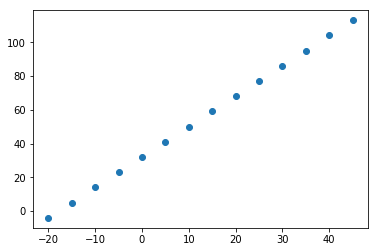

In [15]:
plt.scatter(temps_C, temps_F)

`plt.scatter` is a function that takes two inputs and makes a scatter plot.

    plt.scatter(<X-axis Value>, <Y-axis Values>)

We can also add axis labels with the following functions.

Text(0.5, 1.0, 'Compare C and F Temperature Scales')

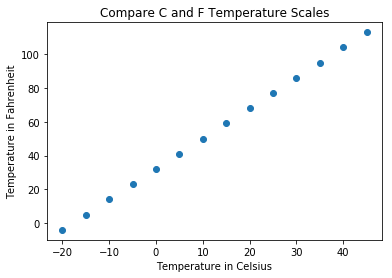

In [16]:
plt.scatter(temps_C, temps_F)

plt.xlabel('Temperature in Celsius')
plt.ylabel('Temperature in Fahrenheit')
plt.title('Compare C and F Temperature Scales')

Instead of a scatter plot, this could also be a line plot by using the `plt.plot()` function instead.

Text(0.5, 1.0, 'Compare C and F Temperature Scales')

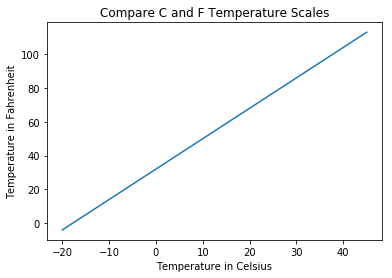

In [17]:
plt.plot(temps_C, temps_F)

plt.xlabel('Temperature in Celsius')
plt.ylabel('Temperature in Fahrenheit')
plt.title('Compare C and F Temperature Scales')

It is possible to overlay plot styles and change design elements of the plots.

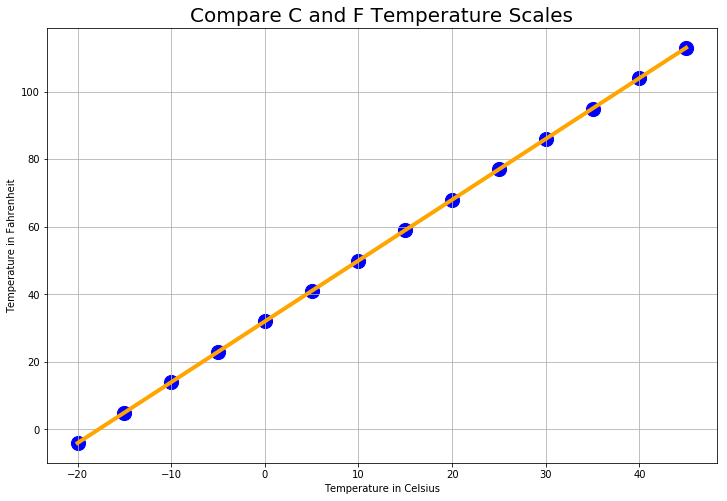

In [23]:
# Before you plot the data, you can change the figure's size
plt.figure(figsize=[12,8])

# Add a scatter and a line plot to the figure
plt.scatter(temps_C, temps_F, color='blue', s=200)
plt.plot(temps_C, temps_F, color='orange', linewidth=4)

# Change the 
plt.xlabel('Temperature in Celsius')
plt.ylabel('Temperature in Fahrenheit')
plt.title('Compare C and F Temperature Scales', fontsize=20)
plt.grid()

---
`matplotlib.pyplot` is a powerful library to make highly customizable and professional-looking figures. It is the user's responsibility, however, to make sure the data displayed is accurate, clean, and readable.

![](../images/fig.png)

There are two ways to generate figures with matplotlib: 
1. The _easy way_
    - Calls to `plt.` functions will automatically create figure and axes objects when they are needed.
        - `plt.plot()`
        - `plt.xlabel()`
        - `plt.title()`
        - `plt.grid()`
2. The _customizable way_, which utilizes the object-oriented nature of figure objects.
    - Explicitly create figures and axes first, and then add or modify chart elements with axes methods.
        - `fig, ax = plt.subplots()`
        - `ax.plot()`
        - `ax.set_xlabel()`
        - `ax.set_title()`
        - `ax.grid()`

You will see both methods used in documentation and examples you find online. For this class, we will mostly use the _easy way_ and show a few examples with the _customizable way_.

`matplotlib` is built to work well with `numpy` arrays. If possible, convert you're data to a numpy array and you'll be in better shape.


# Try it yourself
Make a plot (the easy way) showing two lines:
- `y1=x**2`
- `y2=x**2`

for a range of x values between 0 and 5 with increment of 0.5.


In [ ]:
# Make an array of x values

# Make array for y1

# Make array for y2

# Plot y1 and y2 on the same plot



**After you made the two lines, follow Brian's instructions to add a legend.**

<br><br>
---
# 🚀 Projectile Path
In physics class, you probably calculated the path of a projectile. The following equations describe a projectile's path and are solved in the `projectile` function. Notice that the function requires more than one input and produces more than one output.

Reference: [Projectile Motion (Wikipedia)](https://en.wikipedia.org/wiki/Projectile_motion)

|-|Equation|
|--|--|
|X-Position|\begin{equation}
    x = v_0t\cos\theta
\end{equation}
|Y-Position|\begin{equation}
     y = v_0t\sin\theta - \frac{1}{2}gt^2
\end{equation}
|Time of Flight|\begin{equation}
    t = \frac{2v_0\sin\theta}{g}
\end{equation}
|Velocity|\begin{equation}
    v_x = v_0\cos\theta
\end{equation}<br>\begin{equation}
    v_y = v_0\sin\theta-gt
\end{equation}<br>\begin{equation}
    v = \sqrt{v_x^2+v_y^2}
\end{equation}

 

In [ ]:
def projectile(v0, theta, num=51):
    """
    Calculate the x and y position and velocity of a projectile at time t
    when launched at angle theta with velocity v0.
    
    Input:
        v0    - initial velocity of the projectile when launched (m/s)
        theta - angle projectile is launched (degrees)
        num   - number of point calculations per flight used by np.linspace().
                Default is 51, so there will be 50 data points.
    
    Output:
        t     - time vector (seconds)
        x     - x position vector (m)
        y     - y position vector (m)
        v_x   - x-component velocity vector (m/s)
        v_y   - y-component velocity vector (m/s)
        v     - velocity magnitude vector (m/s)
    """
    
    # Gravitational Acceleration
    g = 9.81  # m/s^2
    
    # Calculate total time of flight
    total_t = 2*v0*np.sin(np.deg2rad(theta))/g
    
    # Create a time vector between 0 and total time.
    t = np.linspace(0,total_t,num)
    
    # Calculate X and Y position of projectile
    x = v0*t*np.cos(np.deg2rad(theta))
    y = v0*t*np.sin(np.deg2rad(theta)) - .5*g*t**2
    
    # Compute velocity components and magnitude
    v_x = v0*np.cos(np.deg2rad(theta)) * np.ones_like(t)
    v_y = v0*np.sin(np.deg2rad(theta)) - g*t
    v = np.sqrt(v_x**2+v_y**2)
    
    return t, x, y, v_x, v_y, v

What does the input and output of the `projectile()` function look like?

In [ ]:
initial_velocity = 10  # m/s
angle_theta = 45       # degrees

projectile(initial_velocity, angle_theta)

#### Plot the trajectory of a projectile

In [ ]:
velocity = 20
angle = 45
t, x, y, v_x, v_y, v = projectile(velocity, angle)
plt.plot(x, y)

# Add chart elements
plt.ylabel('Height (m)')
plt.xlabel('Distance (m)')
plt.title('Projectile Path: \n v_0={} m/s; angle={} degrees'.format(velocity,angle))
plt.grid()

#### Plot the trajectory of many projectiles
We can plot many trajectories within a for loop.

In [ ]:
plt.figure(figsize=[10,5])

velocity = 20            # m/s

for angle in range(10,91,10):
    # Compute the path for each
    t, x, y, v_x, v_y, v = projectile(velocity, angle)
    
    plt.plot(x, y, label=r'%s$\degree$ t=%.1f s' % (angle, t[-1]))

plt.legend()
plt.ylim(ymin=0)

plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Projectile Path', fontsize=15);
plt.title('Initial Velocity: %.1f' % velocity, loc='right')

### Exercise #1:
Instead of plotting different projections for different angles, plot projections for different velocities for the same angle.

### Exercise #2:

Change the function `projectile` to accept an input for gravitional acceleration, and then plot the projectile position for each of the different planets. Add a legend to indicate the planet of each projectile. 🌎moo

<img src='../images/accel-of-gravity-other-planets.png'  width=300>

In [ ]:
planets = ['Mercury', 'Venus', 'Earth', 'Moon', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto']
g = [3.59, 8.87, 9.81, 1.62, 3.77, 25.95, 11.08, 10.67, 14.07, 0.42]

# Make a bar graph of gravity on each planet
plt.bar(planets, g)
plt.ylabel('Gravity (m/s^2)')
plt.xticks(rotation=45)
plt.title('Planetary Gravitational Acceleration');

In [ ]:
velocity = 10
angle = 45

# for loop for every planet. Since we want to access values for both planets and g, you might consider using enumerate().
    # call the modified proj_projectile funcntion
    # plot the path and include the name of the planet in the label

# other plot housekeeping (title, labels, legend, etc.)







---
### Want to learn more?

Do not underestimate the usefulness of the documentation. Read them. They are written for you!Read the `numpy` and `matplotlib` documentation to learn additional functions and capabilitites.

> - [Matplotlib Tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)
> - [Numpy Tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html)
> - Introduction and Usage Guide: https://matplotlib.org/tutorials/introductory/usage.html
> - Basic matplotlib plotting (the easy way): https://matplotlib.org/tutorials/introductory/pyplot.html
> - Types of plots: https://matplotlib.org/tutorials/introductory/sample_plots.html
> - Other tutorials: https://matplotlib.org/tutorials/index.html

**Learn something new about Numpy or Matplotlib and share it on Teams in the Python channel.** 

---

# A word on visualization

Some visualizations are better than others. Communicating data and results effectively through figures is both a skill and an art that can be learned. When making figures, pay attention to how it looks visually and if it communicates your point effectively. 

<img src='./images/less-is-more.gif'>
